✅ Libraries imported successfully!

📤 Please upload an image containing circular objects (e.g., coins, bottle caps, eyes):


Saving Lenna_(test_image).png to Lenna_(test_image) (1).png
✅ Image 'Lenna_(test_image) (1).png' uploaded successfully!
✅ 75 circle(s) detected!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


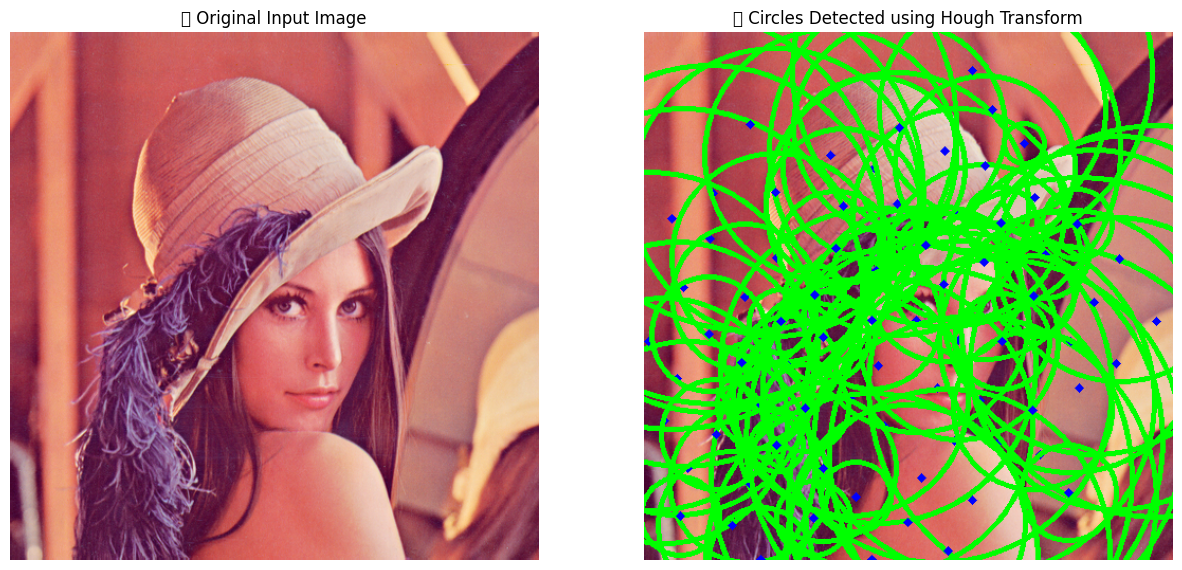

In [ ]:

# STEP 1: IMPORT REQUIRED LIBRARIES
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, HTML

print("✅ Libraries imported successfully!")

# STEP 2: UPLOAD AN IMAGE
print("\n📤 Please upload an image containing circular objects (e.g., coins, bottle caps, eyes):")
uploaded = files.upload()

# Get uploaded filename
filename = list(uploaded.keys())[0]
print(f"✅ Image '{filename}' uploaded successfully!")

# STEP 3: READ AND PREPROCESS IMAGE
img = cv2.imread(filename)
if img is None:
    raise ValueError("❌ Could not read the uploaded image. Please try again with a valid image file.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.medianBlur(gray, 5)


# STEP 4: APPLY HOUGH CIRCLE TRANSFORM
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=40,
    param1=100,
    param2=30,
    minRadius=10,
    maxRadius=200
)

# STEP 5: DRAW DETECTED CIRCLES
output = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(output, (x, y), r, (0, 255, 0), 3)  # Circle outline
        cv2.circle(output, (x, y), 2, (255, 0, 0), 3)  # Center point
    print(f"✅ {len(circles[0])} circle(s) detected!")
else:
    print("⚠️ No circles detected. Try adjusting parameters or upload another image.")

# STEP 6: DISPLAY RESULTS SIDE BY SIDE
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("🖼️ Original Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("🔍 Circles Detected using Hough Transform")
plt.axis("off")

plt.show()

# STEP 7: EXPLANATION
display(HTML("""
<h3>📘 Explanation</h3>
<ul>
<li><b>Left:</b> Original uploaded image.</li>
<li><b>Right:</b> Detected circles are outlined in green; centers marked in blue.</li>
<li>The <b>Hough Circle Transform</b> works by converting edge points into votes in a
3D parameter space (center_x, center_y, radius). Peaks in this space represent circles.</li>
<li>Adjust <code>minRadius</code>, <code>maxRadius</code>, and <code>param2</code> to fine-tune detections for your image.</li>
</ul>
"""))
